In [2]:
from neo4j import GraphDatabase
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [3]:
driver = GraphDatabase.driver('bolt://localhost:7687', auth=('neo4j', 'demo'))

In [4]:
def query_to_pandas(driver, query):
    with driver.session(database="smallworld") as session:
        result = session.run(query)
        return pd.DataFrame(result.data())

In [5]:
path_lengths_query = """
CALL gds.alpha.allShortestPaths.stream('base-grid')
YIELD sourceNodeId, targetNodeId, distance
RETURN toInteger(distance) AS distance, count(*) AS pathCount
ORDER BY toInteger(distance);
"""

In [6]:
path_lengths_df = query_to_pandas(driver, path_lengths_query)

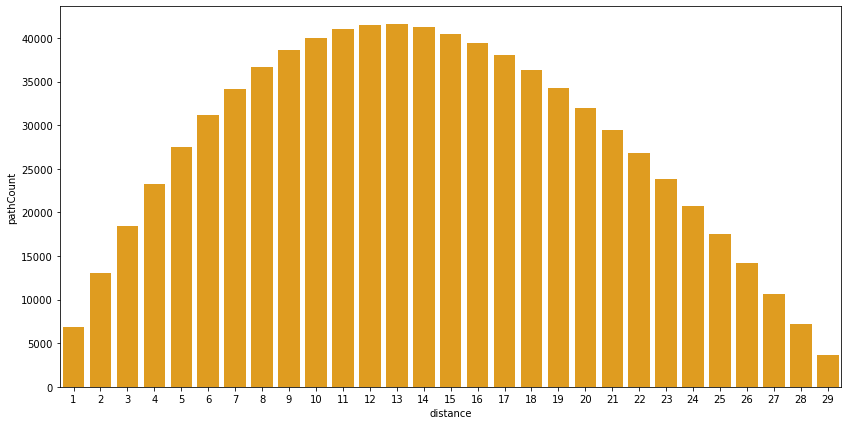

In [7]:
f, ax = plt.subplots(figsize=(14,7))
ax = sns.barplot(data=path_lengths_df, x="distance", y="pathCount", color="orange")

In [8]:
new_path_lengths_query = """
CALL gds.alpha.allShortestPaths.stream('new-grid')
YIELD sourceNodeId, targetNodeId, distance
RETURN toInteger(distance) AS distance, count(*) AS pathCount
ORDER BY toInteger(distance);
"""

In [9]:
new_path_lengths_df = query_to_pandas(driver, new_path_lengths_query)

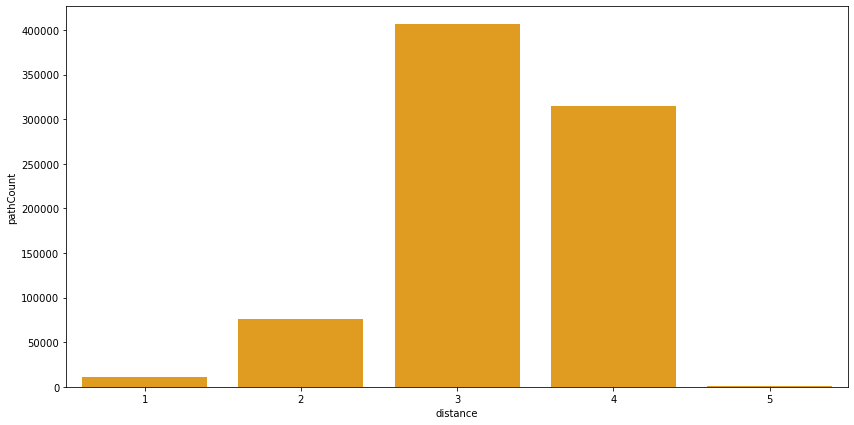

In [10]:
f, ax = plt.subplots(figsize=(14,7))
ax = sns.barplot(data=new_path_lengths_df, x="distance", y="pathCount", color="orange")